# PyTorch for CIFAR10
We test ResNet classifier.
First init some basic environment.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# mobilenetV2 classifier

In [2]:
import torch.optim as optim
import torch.nn as nn
import time
from cifar10.tnt_solver import *
from cifar10.classifiers.mobilenet import MobileNetV2

model = MobileNetV2(num_classes=10)
print(model)
num_params = count_parameters(model)
print('params num:', num_params)

MobileNetV2(
  (layers): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace)
    )
    (1): InvertedResidualBlock(
      (block): Sequential(
        (0): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace)
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU6(inplace)
        (6): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (7): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidualBlock(
      (block): Sequential(
        (0):

# train 

In [3]:
%%time

import torch.nn.functional as F
opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=True)
loss_fn = F.cross_entropy

# lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', factor=0.5, min_lr=1e-4)
# lr_scheduler = optim.lr_scheduler.StepLR(opt, 50, gamma=0.1)
lr_scheduler = optim.lr_scheduler.MultiStepLR(opt, [80, 120], gamma=0.1)
history = main(model, opt, epoch=150, loss_fn=loss_fn, lr_scheduler=lr_scheduler)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/150, lr:1.00e-01
100%|██████████| 625/625 [00:36<00:00, 17.33it/s, loss:1.7740, acc:34.6400%]
Val loss: 1.5711, accuracy: 42.21%
Epoch: 2/150, lr:1.00e-01
100%|██████████| 625/625 [00:34<00:00, 18.08it/s, loss:1.3576, acc:50.5450%]
Val loss: 1.1386, accuracy: 59.03%
Epoch: 3/150, lr:1.00e-01
100%|██████████| 625/625 [00:35<00:00, 17.63it/s, loss:1.1101, acc:60.3650%]
Val loss: 1.0467, accuracy: 63.35%
Epoch: 4/150, lr:1.00e-01
100%|██████████| 625/625 [00:34<00:00, 18.08it/s, loss:0.9718, acc:65.5350%]
Val loss: 0.9046, accuracy: 68.89%
Epoch: 5/150, lr:1.00e-01
100%|██████████| 625/625 [00:35<00:00, 17.79it/s, loss:0.8520, acc:69.9075%]
Val loss: 0.8752, accuracy: 70.05%
Epoch: 6/150, lr:1.00e-01
100%|██████████| 625/625 [00:36<00:00, 17.03it/s, loss:0.7580, acc:73.6425%]
Val loss: 0.7184, accuracy: 74.91%
Epoch: 7/150, lr:1.00e-01
100%|██████████| 625/625 [00:35<

100%|██████████| 625/625 [00:35<00:00, 17.75it/s, loss:0.3936, acc:86.4625%]
Val loss: 0.5032, accuracy: 83.43%
Epoch: 60/150, lr:1.00e-01
100%|██████████| 625/625 [00:34<00:00, 17.88it/s, loss:0.3958, acc:86.3375%]
Val loss: 0.6154, accuracy: 80.14%
Epoch: 61/150, lr:1.00e-01
100%|██████████| 625/625 [00:35<00:00, 17.77it/s, loss:0.3952, acc:86.5275%]
Val loss: 0.3864, accuracy: 86.89%
Epoch: 62/150, lr:1.00e-01
100%|██████████| 625/625 [00:36<00:00, 16.96it/s, loss:0.3928, acc:86.6275%]
Val loss: 0.4993, accuracy: 83.00%
Epoch: 63/150, lr:1.00e-01
100%|██████████| 625/625 [00:35<00:00, 17.83it/s, loss:0.3902, acc:86.5825%]
Val loss: 0.4260, accuracy: 85.65%
Epoch: 64/150, lr:1.00e-01
100%|██████████| 625/625 [00:35<00:00, 17.52it/s, loss:0.3911, acc:86.6200%]
Val loss: 0.4024, accuracy: 86.49%
Epoch: 65/150, lr:1.00e-01
100%|██████████| 625/625 [00:35<00:00, 17.85it/s, loss:0.3942, acc:86.4625%]
Val loss: 0.4381, accuracy: 84.98%
Epoch: 66/150, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:36<00:00, 17.22it/s, loss:0.0749, acc:97.2875%]
Val loss: 0.3067, accuracy: 91.81%
Epoch: 119/150, lr:1.00e-02
100%|██████████| 625/625 [00:34<00:00, 18.24it/s, loss:0.0808, acc:97.1050%]
Val loss: 0.3008, accuracy: 91.63%
Epoch: 120/150, lr:1.00e-02
100%|██████████| 625/625 [00:36<00:00, 17.29it/s, loss:0.0779, acc:97.2325%]
Val loss: 0.3067, accuracy: 92.14%
Epoch: 121/150, lr:1.00e-02
100%|██████████| 625/625 [00:35<00:00, 17.55it/s, loss:0.0763, acc:97.3725%]
Val loss: 0.2988, accuracy: 91.91%
Epoch: 122/150, lr:1.00e-03
100%|██████████| 625/625 [00:36<00:00, 17.17it/s, loss:0.0543, acc:98.1725%]
Val loss: 0.2780, accuracy: 92.54%
Epoch: 123/150, lr:1.00e-03
100%|██████████| 625/625 [00:34<00:00, 17.88it/s, loss:0.0477, acc:98.3800%]
Val loss: 0.2789, accuracy: 92.49%
Epoch: 124/150, lr:1.00e-03
100%|██████████| 625/625 [00:37<00:00, 16.83it/s, loss:0.0438, acc:98.4950%]
Val loss: 0.2819, accuracy: 92.46%
Epoch: 125/150, lr:1.00e-03
100%|██████████| 625

# plot loss history
We check the classifier by plotting the loss and acc.

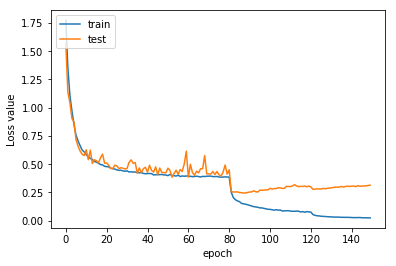

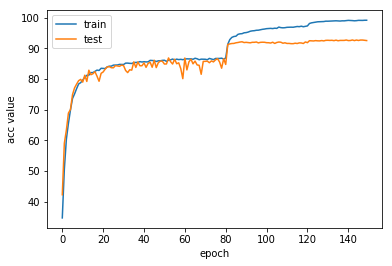

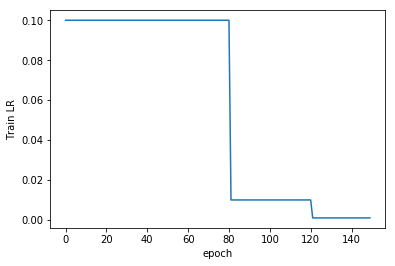

In [4]:
plot_history(history)